In [4]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/yasser/classes/DL26/final_Project")

import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload    

from src.utils.config import CONFIG

from src.utils.data_loader import create_loaders
from src.utils.models_architecture import SRResNet     
from src.utils.helper_functions import train_sr, val_sr, plot_sr_progress
from src.utils.train_model_sr import train_model_sr
import json


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device : {device}")

# CONFIG FROM YAML 
data_root      = CONFIG["paths"]["output_root"]
batch_size     = 16 #CONFIG["training"]["batch_size"]
num_workers    = CONFIG["training"]["num_workers"]
use_aug        = CONFIG["training"].get("use_augmentation", True)

# HYPERPARAMS FROM CONFIG 
lr              = 0.0001 #CONFIG["training"]["lr"]
weight_decay    = 0
num_epochs      = 15 #CONFIG["training"]["epochs"]
step_size       = 30 #CONFIG["training"]["scheduler_step_size"]
gamma           = 0.5 #CONFIG["training"]["scheduler_gamma"]


# LOAD DATA 

train_loader, val_loader, test_loader = create_loaders(
    root=data_root,
    batch_size=batch_size,
    num_workers=num_workers,
    use_augmentation=use_aug
)

model = SRResNet().to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999), weight_decay=weight_decay)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.5)


best_model_path = CONFIG["model"]["best_SRESNET_path"]
last_model_path = CONFIG["model"]["last_SRESNET_path"]
history_path = CONFIG["history"]["SRESNET_history_path"]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
device : cuda

 DATA LOADED:
  Train: 152352 samples
  Val:   19044 samples
  Test:  19044 samples


Loading LAST checkpoint: src/models/checkpoints/SRESNET/last_SRESNET.pth
 Resume from epoch 90 | Best PSNR = 27.88
 Loading training history...

 [SRRESNET] Epoch 91/100


 New BEST model saved at epoch 91 with PSNR = 27.89
Train loss: 0.029311 | Train PSNR: 26.29 dB
Val   loss: 0.028492 | Val   PSNR: 27.89 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 92/100


 New BEST model saved at epoch 92 with PSNR = 27.89
Train loss: 0.029278 | Train PSNR: 26.30 dB
Val   loss: 0.028492 | Val   PSNR: 27.89 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 93/100


 New BEST model saved at epoch 93 with PSNR = 27.89
Train loss: 0.029262 | Train PSNR: 26.31 dB
Val   loss: 0.028422 | Val   PSNR: 27.89 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 94/100


 New BEST model saved at epoch 94 with PSNR = 27.94
Train loss: 0.029246 | Train PSNR: 26.31 dB
Val   loss: 0.028206 | Val   PSNR: 27.94 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 95/100


Train loss: 0.029234 | Train PSNR: 26.32 dB
Val   loss: 0.028256 | Val   PSNR: 27.93 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 96/100


Train loss: 0.029221 | Train PSNR: 26.32 dB
Val   loss: 0.028687 | Val   PSNR: 27.86 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 97/100


Train loss: 0.029214 | Train PSNR: 26.33 dB
Val   loss: 0.028223 | Val   PSNR: 27.93 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 98/100


Train loss: 0.029206 | Train PSNR: 26.33 dB
Val   loss: 0.028266 | Val   PSNR: 27.93 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 99/100


Train loss: 0.029192 | Train PSNR: 26.33 dB
Val   loss: 0.028304 | Val   PSNR: 27.91 dB
-> LR: 0.00001250

 [SRRESNET] Epoch 100/100


 New BEST model saved at epoch 100 with PSNR = 27.95
Train loss: 0.029189 | Train PSNR: 26.33 dB
Val   loss: 0.028112 | Val   PSNR: 27.95 dB
-> LR: 0.00001250


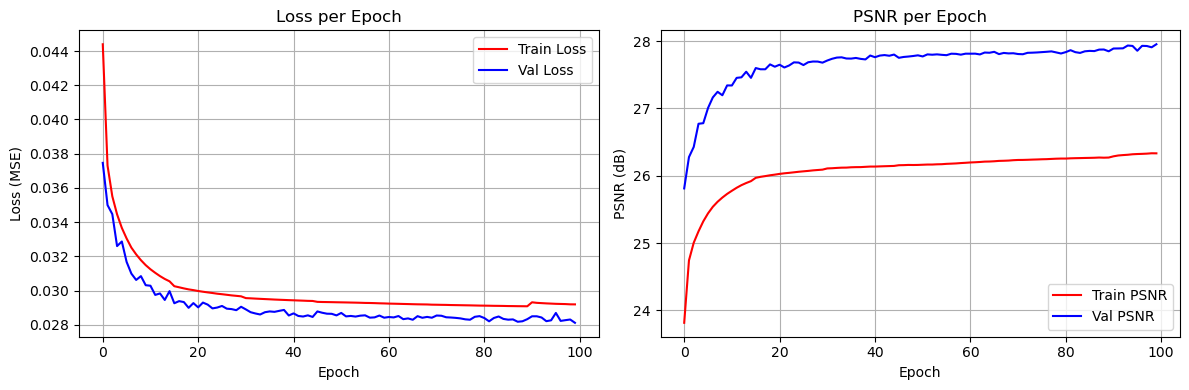

0

In [5]:
num_epochs = 10
train_model_sr(
    model=model,
    model_name="SRRESNET",
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=num_epochs,
    scale_factor=4,
    model_requires_upscale=False,
    best_model_path=best_model_path,
    last_model_path=last_model_path,
    mode="resume",
    history_path=history_path,
    use_amp=True  
)


In [3]:
from src.utils.helper_functions import train_sr, val_sr, plot_sr_progress
